# <h1 style='background:#00FFFF; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>TOP INSTAGRAM INFLUENCERS DATA</center></h1>

<img src = "https://i.gifer.com/9uhG.gif" width = 900 height = 400/>

Sobre este arquivo:

Neste arquivo, basicamente há 10 atributos. Ele foi ordenado com base na classificação que foi decidida com base em "seguidores".

rank: Classificação do Influenciador com base no número de seguidores que ele tem

channel_info: Nome de usuário do Instagrammer

influence score: Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade

posts: Número de posts que eles fizeram até agora

followers: Número de seguidores do usuário

avg_likes: Média de curtidas em posts do Instagrammer (total de curtidas/total de posts)

60_day_eng_rate: Taxa de engajamento dos últimos 60 dias do Instagrammer como facção de engajamentos que eles fizeram até agora

new_post_avg_like: Média de curtidas que eles têm em novos posts

total de curtidas: Total de curtidas que o usuário obteve em seus posts. (em bilhões)

country: País ou região de origem do usuário.
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Baixar o arquivo usando o gdown
!gdown '1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i'

# Verificar os arquivos no diretório atual
!ls

# Tentar carregar o arquivo baixado
try:
    dataset = pd.read_csv('top_insta_influencers_data.csv')  # Certifique-se que o nome esteja correto após o !ls
    print("Arquivo carregado com sucesso!")
    dataset.head()
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome ou caminho do arquivo.")

# Opcional: Verifique o diretório atual
import os
print("Diretório atual:", os.getcwd())


Downloading...
From: https://drive.google.com/uc?id=1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i
To: /content/top_insta_influencers_data.csv
100% 12.6k/12.6k [00:00<00:00, 43.8MB/s]
sample_data  top_insta_influencers_data.csv
Arquivo carregado com sucesso!
Diretório atual: /content


In [ ]:
dataset.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# Renomear as colunas para facilitar a interpretação
dataset.rename(columns={
    'rank':'Classificação',
    'channel_info': 'Nome',
    'influence_score': 'Pontuação',
    'posts': 'Postagens',
    'followers': 'Seguidores',
    'avg_likes': 'Media_Curtidas',
    '60_day_eng_rate': 'Taxa_Engajamento',
    'new_post_avg_like': 'Media_Curtidas_Novas',
    'total_likes': 'Likes',
    'country': 'País'}, inplace=True)

# Exibir as primeiras linhas do dataset para verificar as mudanças
dataset.head()


,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# Inicializar um DataFrame vazio para armazenar a análise
analise_insta = pd.DataFrame()

# Adicionar as colunas relevantes do dataset original
analise_insta['Influenciador'] = dataset['Nome']
analise_insta['Classificação'] = dataset['Classificação']

# Função para converter os valores de 'k', 'm', 'b' para números inteiros
def convert_postagens(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        else:
            return float(value)
    else:
        return value

# Aplicar a função de conversão para colunas relevantes
analise_insta['Postagens'] = dataset['Postagens'].apply(convert_postagens)
analise_insta['Seguidores'] = dataset['Seguidores'].apply(convert_postagens)
analise_insta['Media_Curtidas'] = dataset['Media_Curtidas'].apply(convert_postagens)
analise_insta['Media_Curtidas_Novas'] = dataset['Media_Curtidas_Novas'].apply(convert_postagens)

# Converter a taxa de engajamento para um número decimal
analise_insta["Taxa_Engajamento"] = dataset["Taxa_Engajamento"].replace("%", "", regex=True)
analise_insta["Taxa_Engajamento"] = analise_insta["Taxa_Engajamento"].astype(float) / 100

# Adicionar a coluna de País
analise_insta['País'] = dataset['País']

# Visualizar o DataFrame final
print(analise_insta.head())

# Visualizar algumas estatísticas descritivas
analise_insta.describe()


#Visualizar informações gerais do datafram
analise_insta.info()



  Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0     cristiano              1     3300.0  475800000.0       8700000.0   
1   kyliejenner              2     6900.0  366200000.0       8300000.0   
2      leomessi              3      890.0  357300000.0       6800000.0   
3   selenagomez              4     1800.0  342700000.0       6200000.0   
4       therock              5     6800.0  334100000.0       1900000.0   

   Media_Curtidas_Novas  Taxa_Engajamento           País  
0             6500000.0            0.0139          Spain  
1             5900000.0            0.0162  United States  
2             4400000.0            0.0124            NaN  
3             3300000.0            0.0097  United States  
4              665300.0            0.0020  United States  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  ---

# Visualizando Correlações

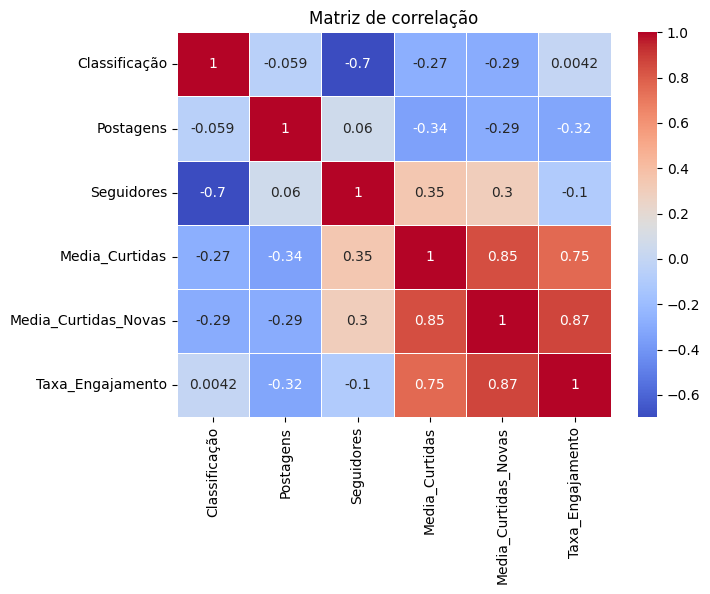

In [ ]:
correlação = analise_insta.drop (columns = ['País', 'Influenciador']).corr()
plt.figure (figsize = (7, 5))
sns.heatmap (correlação, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title ('Matriz de correlação')
plt.show()

# Tratamento de valores ausentes

In [ ]:
# Substitui o valor nulo pela mediana da coluna. Como só existe um valor nulo na taxa de engajamento, possivelmente não seria um grande problema deletar toda a linha
analise_insta['Taxa_Engajamento'] = analise_insta['Taxa_Engajamento'].fillna(analise_insta['Taxa_Engajamento'].median())

# Substitui os 62 valores nulos pela moda (país que mais aparece)
# Preencher NaN na coluna 'País' com a moda ou também posso deletar essa coluna
analise_insta['País'] = analise_insta['País'].fillna(analise_insta['País'].mode()[0])

analise_insta.info()

print(analise_insta.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influenciador         200 non-null    object 
 1   Classificação         200 non-null    int64  
 2   Postagens             200 non-null    float64
 3   Seguidores            200 non-null    float64
 4   Media_Curtidas        200 non-null    float64
 5   Media_Curtidas_Novas  200 non-null    float64
 6   Taxa_Engajamento      200 non-null    float64
 7   País                  200 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB
  Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0     cristiano              1     3300.0  475800000.0       8700000.0   
1   kyliejenner              2     6900.0  366200000.0       8300000.0   
2      leomessi              3      890.0  357300000.0       6800000.0   
3   selenagomez            

# Tratamento de Outliers

In [ ]:
analise_insta.describe()

colunas = ['Media_Curtidas', 'Postagens', 'Seguidores', 'Media_Curtidas_Novas', 'Taxa_Engajamento']
# Utilizando a técnica IQR
for coluna in colunas:
  Q1 = analise_insta [coluna].quantile (0.25)
  Q3 = analise_insta [coluna]. quantile (0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  analise_insta = analise_insta [(analise_insta [coluna] >= limite_inferior) & (analise_insta [coluna] <= limite_superior)]

analise_insta


,Influenciador,Classificação,Postagens,Seguidores,Media_Curtidas,Media_Curtidas_Novas,Taxa_Engajamento,País
33,dualipa,34,1300.0,85900000.0,2100000.0,1100000.0,0.0126,United Kingdom
34,gal_gadot,35,1700.0,85600000.0,1400000.0,586500.0,0.0069,United States
35,vindiesel,36,1800.0,82300000.0,1400000.0,482300.0,0.0060,United States
36,nasa,37,3600.0,81300000.0,1200000.0,1200000.0,0.0153,United States
37,priyankachopra,38,3600.0,81100000.0,1600000.0,802900.0,0.0100,United States
...,...,...,...,...,...,...,...,...
195,iambeckyg,196,2300.0,33200000.0,623800.0,464700.0,0.0140,United States
196,nancyajram,197,3800.0,33200000.0,390400.0,208000.0,0.0064,France
197,luansantana,198,770.0,33200000.0,193300.0,82600.0,0.0026,Brazil
198,nickjonas,199,2300.0,33000000.0,719600.0,467700.0,0.0142,United States


# Normalização das Variáveis Independentes

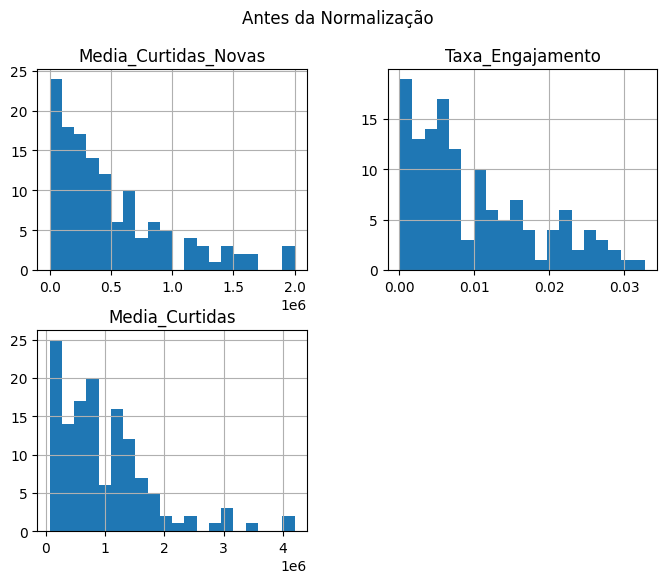

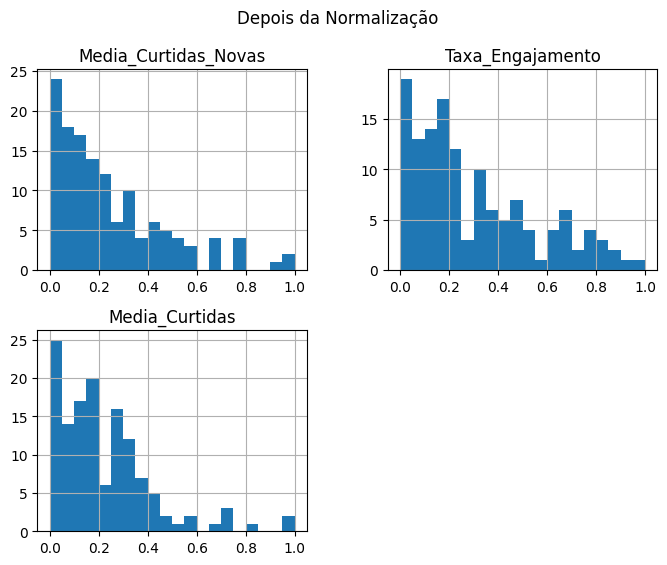

In [ ]:
# Inicio o scaler
scaler = MinMaxScaler()

# Faço uma copia do analise_insta
analise_insta_normalizados = analise_insta.copy()

# Crio uma list
colunas_para_normalizar = ['Media_Curtidas_Novas', 'Taxa_Engajamento', 'Media_Curtidas']

analise_insta_normalizados[colunas_para_normalizar] = scaler.fit_transform(analise_insta[colunas_para_normalizar])

# Histograma dos dados antes da normalização
analise_insta[['Media_Curtidas_Novas', 'Taxa_Engajamento', 'Media_Curtidas']].hist(bins=20, figsize=(8, 6))
plt.suptitle('Antes da Normalização')
plt.show()

# Histograma dos dados depois da normalização
analise_insta_normalizados[['Media_Curtidas_Novas', 'Taxa_Engajamento', 'Media_Curtidas']].hist(bins=20, figsize=(8, 6))
plt.suptitle('Depois da Normalização')
plt.show()

# Regressão Linear

Erro médio quadrático (MSE): 0.01
Raiz do Erro médio quadrático (RMSE): 0.08
Erro médio absoluto (MAE): 0.06
Coeficiente de determinação (R2): 0.69


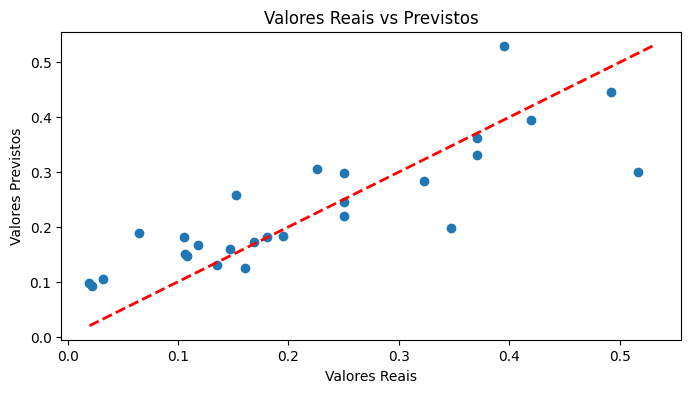

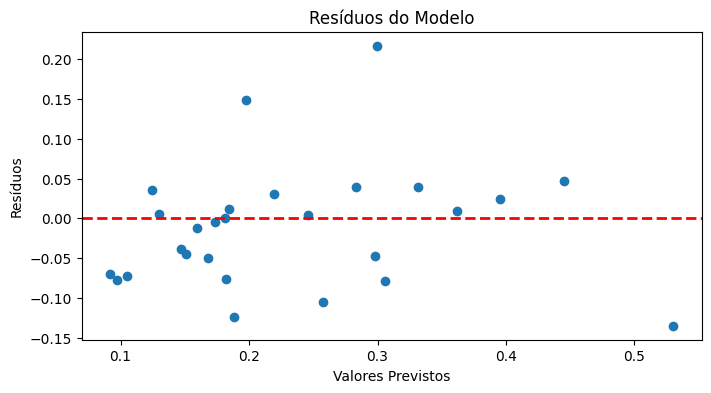

In [ ]:
# Dividir os dados em variáveis independentes (X) e dependente (y)
X = analise_insta_normalizados[['Media_Curtidas_Novas', 'Taxa_Engajamento']]
y = analise_insta_normalizados['Media_Curtidas']

# Dividir os dados em conjunto de treino e teste(80% treino e 20% teste) usando o x e y normalizado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt (mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas de avaliação
print (f"Erro médio quadrático (MSE): {mse :.2f}")
print (f"Raiz do Erro médio quadrático (RMSE): {rmse :.2f}")
print (f"Erro médio absoluto (MAE): {mae :.2f}")
print (f"Coeficiente de determinação (R2): {r2 :.2f}")


# Visualização da relação entre os valores reais e previstos
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred)

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle = '--', lw=2)
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

# Visualização dos resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Resíduos do Modelo')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()


# Validação Crusada

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizando a validação cruzada utilizando 5 folds
y_cv_pred = cross_val_score(model, X, y, cv=5)

# Exibir as métricas de avaliação
print("Validação Cruzada:")
print(f'Média MSE: {np.mean(y_cv_pred)}')
print(f'Desvio Padrão MSE: {np.std(y_cv_pred)}')

Validação Cruzada:
Média MSE: 0.39333290379160435
Desvio Padrão MSE: 0.22743210666690455


# Conclusão

Os resultados que obtive foram razoáveis, visto que obtive valores baixos de MSE, RMSE e MAE. Ou seja, meu modelo está prevendo as "media_curtidas" com baixo erro, pode haver algum erro na escala dos dados ou algo desse tipo. O R² que obtive foi razoável, portanto, meu modelo explica os dados de forma mediana, mas possui espaço para melhorias. Eu utilizei o IQR para remover os outliers. Também fiz validação cruzada com 5 folds e obtive valores baixos no MSE e no desvio padrão do mesmo, com isso, "teoricamente", o meu modelo erra pouco em relação aos valores reais. Estou aberto a discutir os meus resultados a fim de identificar erros e encontrar formas de melhorar.